<a href="https://colab.research.google.com/github/Mario-RJunior/calculadora-imoveis/blob/master/analise_exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1) Importando os dados

In [1]:
# Importanto as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Recuperando o link da base de dados gerada no estudo de web scraping
LINK = 'https://raw.githubusercontent.com/Mario-RJunior/web-scraping-ML/master/dados_imoveis.csv'

In [3]:
# Gerando o dataframe
df = pd.read_csv(LINK)
df.drop(columns='Unnamed: 0', inplace=True)
df.head()

,zona,quartos,area,preco
0,norte,2.0,90,990.000
1,norte,2.0,55,1.600
2,norte,3.0,136,4.500
3,norte,2.0,51,1.326
4,norte,1.0,28,900.000


In [4]:
# Verificando dados estatísticos
df.describe()

,quartos,area,preco
count,1342.000000,1344.000000,1344.000000
mean,1.895678,83.278274,59.439588
std,0.773052,204.359982,209.995727
min,1.000000,8.000000,1.000000
25%,1.000000,45.000000,1.500000
50%,2.000000,60.000000,2.080000
75%,2.000000,82.000000,3.250000
max,5.000000,7000.000000,990.000000


In [5]:
# Verificando valores nulos
df.isna().sum()

zona       0
quartos    2
area       0
preco      0
dtype: int64

In [6]:
# Verificando os tipos das variáveis
df.dtypes

zona        object
quartos    float64
area         int64
preco      float64
dtype: object

In [7]:
# Verificando a correlação
df.corr()

,quartos,area,preco
quartos,1.000000,0.208945,-0.248522
area,0.208945,1.000000,-0.049144
preco,-0.248522,-0.049144,1.000000


## 2) Análise Exploratória dos Dados e Preprocessamento

Podemos agora fazer alguns gráficos para entendermos os dados. Para isso, iremos separar a base de dados entre base de treino e de teste e por fim cumprir as etapas de preprocessamentos em cada uma separadamente.

In [8]:
# Divisão da base entre treino e teste
treino, teste = train_test_split(df, 
                                 stratify=df['zona'], 
                                 test_size=0.25, 
                                 random_state=0)

In [9]:
print(f'Base de treino {treino.shape} \nBase de teste: {teste.shape}')

Base de treino (1008, 4) 
Base de teste: (336, 4)


- Base de treino

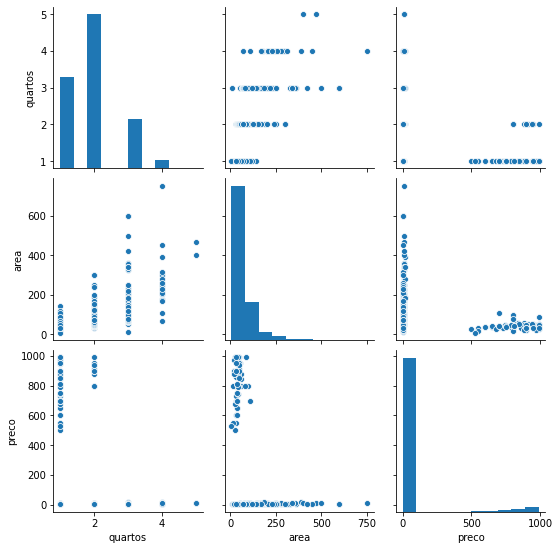

In [10]:
# Distplot com os dados originais
sns.pairplot(data=treino)
plt.show()

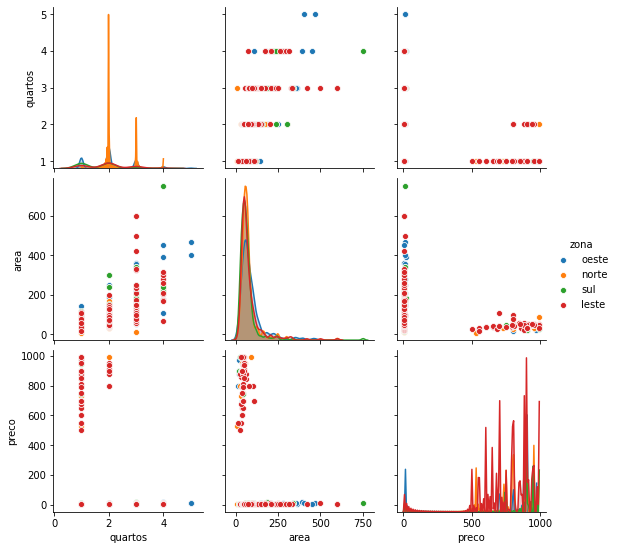

In [11]:
# Distplot com os dados originais
sns.pairplot(data=treino, hue='zona')
plt.show()

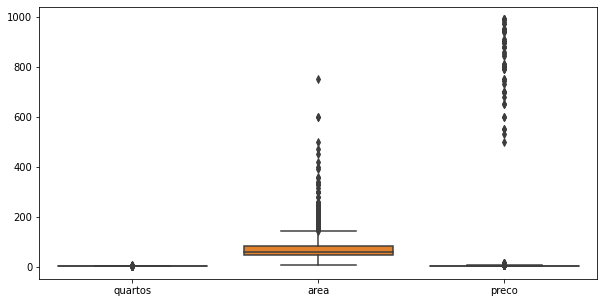

In [12]:
# Boxplot com os dados originais de treino
fig = plt.figure(figsize=(10,5))
sns.boxplot(data=treino)
plt.show()

### 2.1) Tratamento de valores missing

In [13]:
colunas = ['quartos', 'area', 'preco']
treino_num = treino[colunas]

In [14]:
# Preenchendo valores NaN
treino_medianas = treino_num.median()
treino_num = treino_num.fillna(treino_medianas)

In [15]:
# Verificando valores nulos para base de treino
treino_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1008 entries, 1204 to 358
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   quartos  1008 non-null   float64
 1   area     1008 non-null   int64  
 2   preco    1008 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 31.5 KB


In [16]:
# Transformando dados em escala logarítmica
treino_num = treino_num.apply(np.log1p)

In [17]:
treino_num.head()

,quartos,area,preco
1204,1.098612,4.709530,1.386294
184,1.386294,4.110874,0.854415
1039,1.098612,4.110874,0.803346
343,1.098612,3.713572,0.779325
1210,1.098612,3.970292,0.993252


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


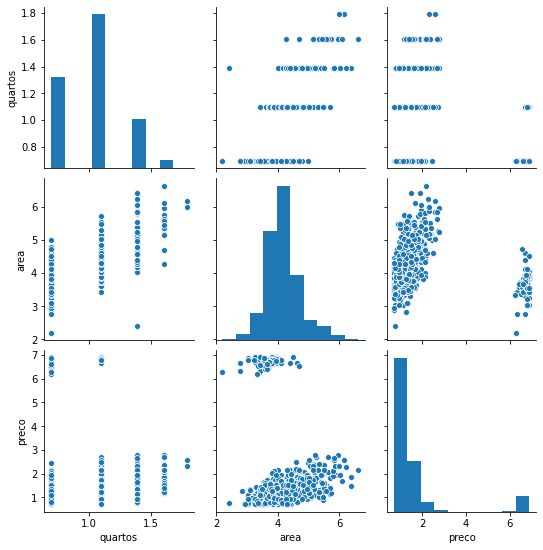

In [18]:
treino[colunas] = treino_num
sns.pairplot(data=treino)
plt.show()

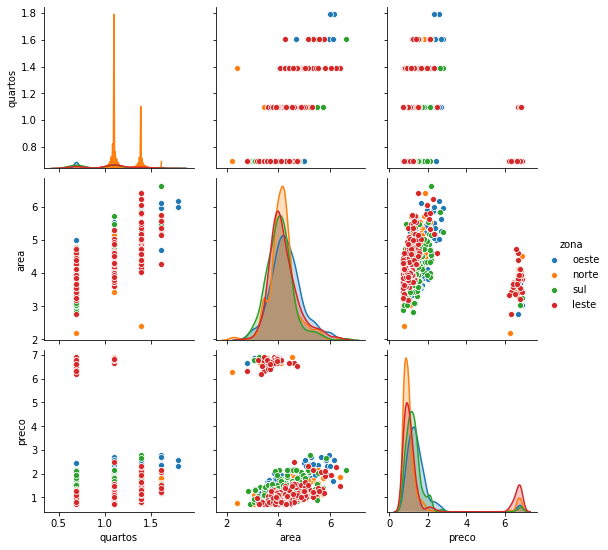

In [19]:
sns.pairplot(data=treino, hue='zona')
plt.show()

### 2.2) Análise de outliers

Iremos agora remover os outliers do nosso dataframe.

In [20]:
# Análise de outliers

REMOVER_OUTLIERS = False

quartis = treino_num.quantile([0.25,0.5,0.75])

Q1 = quartis.loc[0.25]
Q3 = quartis.loc[0.75]
IQR = Q3-Q1

k = 1.5 
limite_inferior = Q1-k*IQR
limite_superior = Q1+k*IQR

treino_num_sem_outlier = treino_num[treino_num>=limite_inferior].dropna()
treino_num_sem_outlier = treino_num_sem_outlier[treino_num_sem_outlier<=limite_superior].dropna()

if REMOVER_OUTLIERS:
  treino = treino.loc[treino_num_sem_outlier.index]

treino_num_sem_outlier

,quartos,area,preco
1204,1.098612,4.709530,1.386294
1039,1.098612,4.110874,0.803346
343,1.098612,3.713572,0.779325
1210,1.098612,3.970292,0.993252
375,0.693147,3.828641,1.528228
...,...,...,...
284,1.098612,4.143135,0.741937
107,1.098612,4.276666,0.932164
18,0.693147,3.828641,1.252763
685,1.098612,4.290459,0.693147


Repetindo o pairplot para os dados em escala logarítmica.

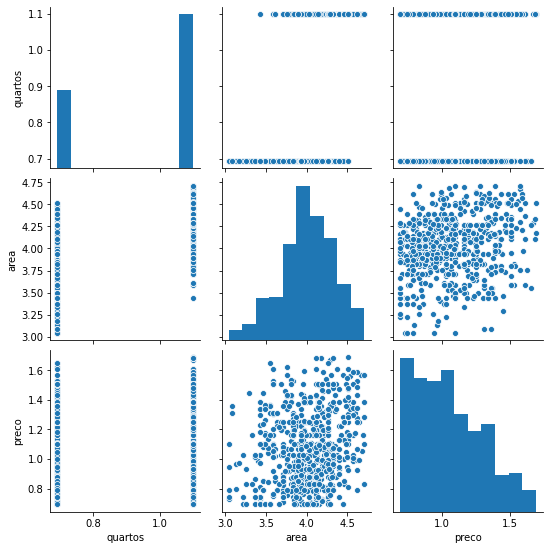

In [21]:
sns.pairplot(data=treino_num_sem_outlier)
plt.show()

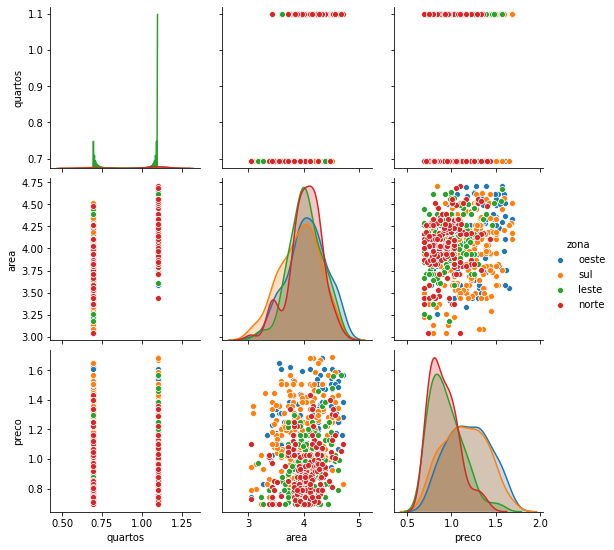

In [22]:
sns.pairplot(treino.loc[treino_num_sem_outlier.index], hue='zona')
plt.show()

### 2.3) Tratamento de colunas categóricas

Agora devemos dar uma atenção especial à coluna categórica "zona". Uma vez que nosso dataframe será submetido à algorítmos de machine learning que utilizam cálculos matemáticos para busca de padrões, não podemos deixar colunas com dados no formato object (ou seja, do tipo string).Essas variáveis são chamadas ***dummy*** e o processo de conversão nestas variáveis é chamado ***One-Hot Encoding***.

In [23]:
# Criando variáveis dummy

treino = pd.get_dummies(treino)
treino.head()

,quartos,area,preco,zona_leste,zona_norte,zona_oeste,zona_sul
1204,1.098612,4.709530,1.386294,0,0,1,0
184,1.386294,4.110874,0.854415,0,1,0,0
1039,1.098612,4.110874,0.803346,0,0,1,0
343,1.098612,3.713572,0.779325,0,0,0,1
1210,1.098612,3.970292,0.993252,0,0,1,0


### 2.4) Preprocessamento para base de teste

- Valores missing

In [24]:
teste.isnull().sum()

zona       0
quartos    1
area       0
preco      0
dtype: int64

In [25]:
teste = teste.fillna(treino_medianas)
teste.head()

,zona,quartos,area,preco
546,sul,1.0,30,1.25
423,sul,2.0,75,4.85
1336,oeste,3.0,126,8.00
961,leste,2.0,74,1.48
1148,oeste,2.0,54,1.48


- Transformação para escala logarítmica

In [27]:
teste[colunas] = teste[colunas].apply(np.log1p)
teste.head()

,zona,quartos,area,preco
546,sul,0.693147,3.433987,0.810930
423,sul,1.098612,4.330733,1.766442
1336,oeste,1.386294,4.844187,2.197225
961,leste,1.098612,4.317488,0.908259
1148,oeste,1.098612,4.007333,0.908259


- Variáveis categóricas

In [28]:
teste = pd.get_dummies(teste)
teste.head()

,quartos,area,preco,zona_leste,zona_norte,zona_oeste,zona_sul
546,0.693147,3.433987,0.810930,0,0,0,1
423,1.098612,4.330733,1.766442,0,0,0,1
1336,1.386294,4.844187,2.197225,0,0,1,0
961,1.098612,4.317488,0.908259,1,0,0,0
1148,1.098612,4.007333,0.908259,0,0,1,0
